<a href="https://colab.research.google.com/github/harkpun/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* #### Date : year-month-day
* #### Rented Bike count - Count of bikes rented at each hour
* #### Hour - Hour of he day
* #### Temperature-Temperature in Celsius
* #### Humidity - %
* #### Windspeed - m/s
* #### Visibility - 10m
* #### Dew point temperature - Celsius
* #### Solar radiation - MJ/m2
* #### Rainfall - mm
* #### Snowfall - cm
* #### Seasons - Winter, Spring, Summer, Autumn
* #### Holiday - Holiday/No holiday
* #### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Regression/SeoulBikeData.csv', encoding= 'unicode_escape')
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
2947  02/04/2018               1779    19          19.10 %           60   
3942  14/05/2018                552     6          12.10 %           89   
3470  24/04/2018                942    14          16.00 %           52   
7081  22/09/2018                875     1          19.50 %           83   
1224  21/01/2018                196     0          -0.30 %           60   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
2947            3.40 %              1592                    11.10 %   
3942            0.30 %               252                    10.30 %   
3470            1.70 %              2000                     6.10 %   
7081            1.50 %              1459                    16.50 %   
1224            1.90 %               340                    -7.10 %   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
2947                   0.10 %        0.00 %         0.00 %  Spring   
3942                   0.02 %        0.00 %         0.00 %  Spring   
3470                   1.22 %        0.00 %         0.00 %  Spring   
7081                   0.00 %        0.00 %         0.00 %  Autumn   
1224                   0.00 %        0.00 %         0.00 %  Winter   

         Holiday Functioning Day  
2947  No Holiday             Yes  
3942  No Holiday             Yes  
3470  No Holiday             Yes  
7081  No Holiday             Yes  
1224  No Holiday             Yes

In [164]:
df_copy = df.copy()

In [165]:
df.shape

(8760, 14)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [167]:
df.describe().T

count       mean      std      min      25%  \
Rented Bike Count         8,760.00 %   704.60 % 645.00 %   0.00 % 191.00 %   
Hour                      8,760.00 %    11.50 %   6.92 %   0.00 %   5.75 %   
Temperature(°C)           8,760.00 %    12.88 %  11.94 % -17.80 %   3.50 %   
Humidity(%)               8,760.00 %    58.23 %  20.36 %   0.00 %  42.00 %   
Wind speed (m/s)          8,760.00 %     1.72 %   1.04 %   0.00 %   0.90 %   
Visibility (10m)          8,760.00 % 1,436.83 % 608.30 %  27.00 % 940.00 %   
Dew point temperature(°C) 8,760.00 %     4.07 %  13.06 % -30.60 %  -4.70 %   
Solar Radiation (MJ/m2)   8,760.00 %     0.57 %   0.87 %   0.00 %   0.00 %   
Rainfall(mm)              8,760.00 %     0.15 %   1.13 %   0.00 %   0.00 %   
Snowfall (cm)             8,760.00 %     0.08 %   0.44 %   0.00 %   0.00 %   

                                 50%        75%        max  
Rented Bike Count           504.50 % 1,065.25 % 3,556.00 %  
Hour                         11.50 %    17.25 %    23.00 %  
Temperature(°C)              13.70 %    22.50 %    39.40 %  
Humidity(%)                  57.00 %    74.00 %    98.00 %  
Wind speed (m/s)              1.50 %     2.30 %     7.40 %  
Visibility (10m)          1,698.00 % 2,000.00 % 2,000.00 %  
Dew point temperature(°C)     5.10 %    14.80 %    27.20 %  
Solar Radiation (MJ/m2)       0.01 %     0.93 %     3.52 %  
Rainfall(mm)                  0.00 %     0.00 %    35.00 %  
Snowfall (cm)                 0.00 %     0.00 %     8.80 %

In [168]:
df.describe(include='object')

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Spring  No Holiday             Yes
freq            24    2208        8328            8465

In [169]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
# pd.options.display.float_format = '{:,.2f}'.format

Date                        0.00 %
Rented Bike Count           0.00 %
Hour                        0.00 %
Temperature(°C)             0.00 %
Humidity(%)                 0.00 %
Wind speed (m/s)            0.00 %
Visibility (10m)            0.00 %
Dew point temperature(°C)   0.00 %
Solar Radiation (MJ/m2)     0.00 %
Rainfall(mm)                0.00 %
Snowfall (cm)               0.00 %
Seasons                     0.00 %
Holiday                     0.00 %
Functioning Day             0.00 %
dtype: float64


In [170]:
df.duplicated().sum()

0

In [171]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [172]:
# function to get information about data_type, null_count, unique_count in thr dataframe format

def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

printinfo()

data_type  null_count  unique_count
Date                         object           0           365
Rented Bike Count             int64           0          2166
Hour                          int64           0            24
Temperature(°C)             float64           0           546
Humidity(%)                   int64           0            90
Wind speed (m/s)            float64           0            65
Visibility (10m)              int64           0          1789
Dew point temperature(°C)   float64           0           556
Solar Radiation (MJ/m2)     float64           0           345
Rainfall(mm)                float64           0            61
Snowfall (cm)               float64           0            51
Seasons                      object           0             4
Holiday                      object           0             2
Functioning Day              object           0             2

In [268]:
df.Date = pd.to_datetime(df.Date)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()

df.drop('Date', axis=1, inplace=True)

In [174]:
df=df.astype({'Hour':'object'})

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [270]:
# data conversion

def hour(x):
    ''' converting hours into session like mornig, Noon, Night etc.
        transforming data numeric to category. 
    '''
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make category
df['Session'] = df['Hour'].apply(hour)

In [177]:
df.agg(['skew', 'kurtosis']).T

skew  kurtosis
Rented Bike Count          1.15 %    0.85 %
Hour                       0.00 %   -1.20 %
Temperature(°C)           -0.20 %   -0.84 %
Humidity(%)                0.06 %   -0.80 %
Wind speed (m/s)           0.89 %    0.73 %
Visibility (10m)          -0.70 %   -0.96 %
Dew point temperature(°C) -0.37 %   -0.76 %
Solar Radiation (MJ/m2)    1.50 %    1.13 %
Rainfall(mm)              14.53 %  284.99 %
Snowfall (cm)              8.44 %   93.80 %
Day                        0.01 %   -1.19 %
Month                     -0.01 %   -1.21 %
Year                      -2.98 %    6.87 %

In [180]:
# Grouping by functioning day and calculating the total Rented Bike Count
df.groupby('Functioning Day')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

Functioning Day  Rented Bike Count
0             Yes            6172314
1              No                  0

In [181]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()

Seasons  Rented Bike Count
0  Summer            2283234
1  Autumn            1790002
2  Spring            1611909
3  Winter             487169

In [182]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

Holiday  Rented Bike Count
0  No Holiday            5956419
1     Holiday             215895

In [224]:
#sepreting numerical and categorical data

numeric_features = df.describe().columns
category_features = df.describe(include='object').columns

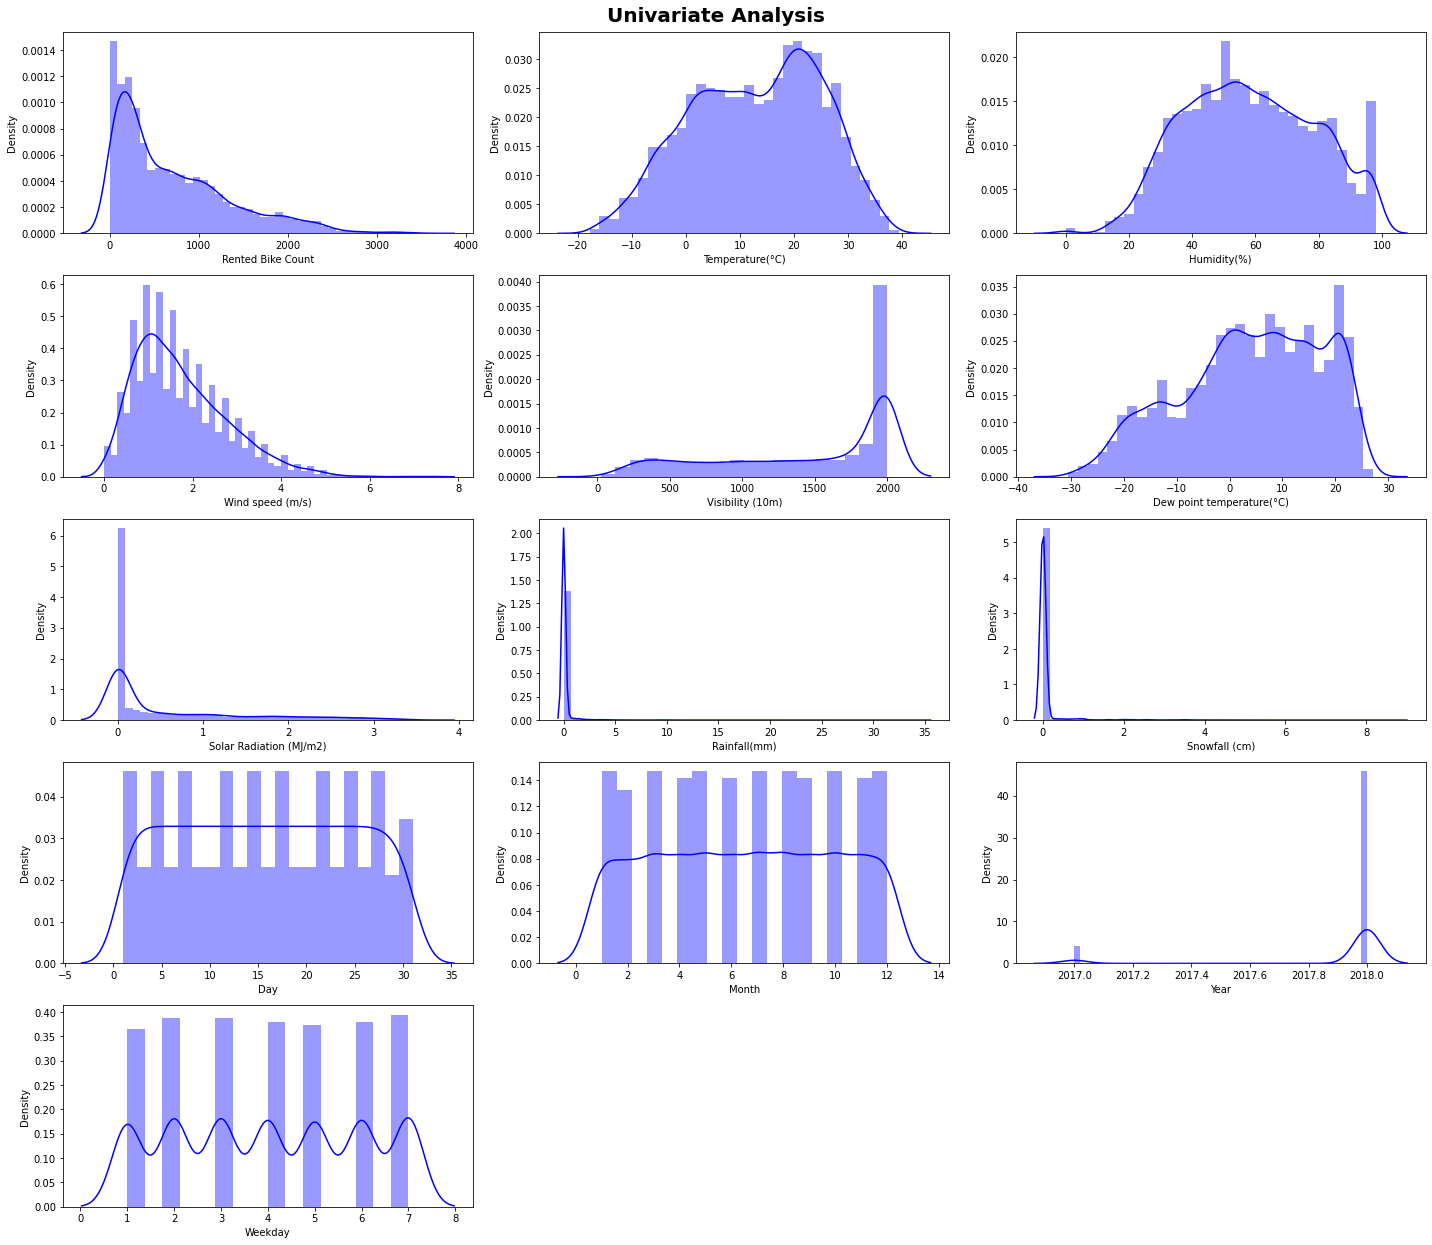

In [225]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.distplot(x=df[numeric_features[i]], kde=True, color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [185]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'Weekday'],
      dtype='object')

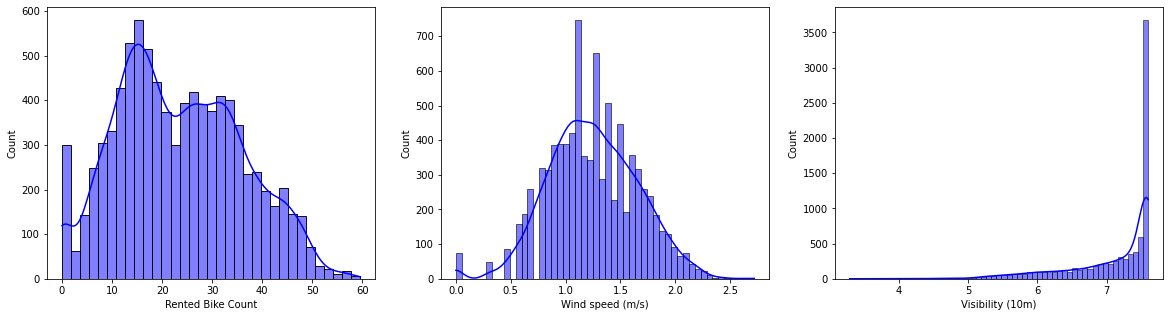

In [186]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,5)

sns.histplot(x=np.sqrt(df['Rented Bike Count']), kde=True, color='blue', ax=axs[0])
sns.histplot(x=np.sqrt(df['Wind speed (m/s)']),color='blue', kde=True, ax=axs[1])
sns.histplot(x=np.log(df['Visibility (10m)']),color='blue', kde=True, ax=axs[2])

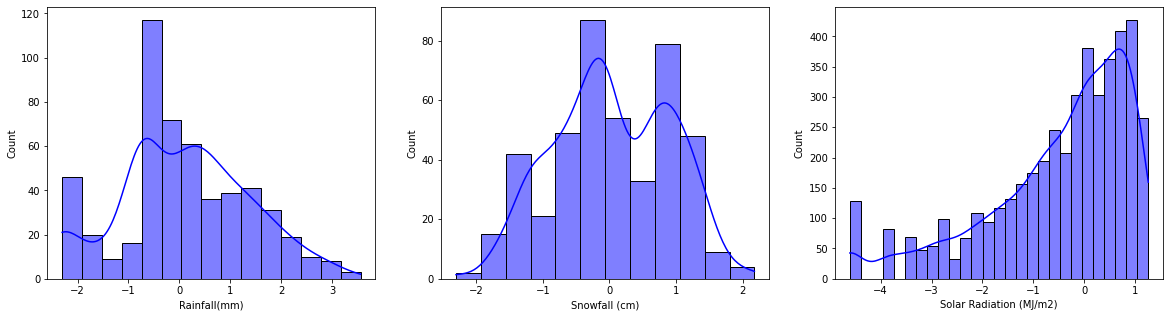

In [187]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,5)

sns.histplot(x=np.log(df['Rainfall(mm)']), kde=True, color='blue', ax=axs[0])
sns.histplot(x=np.log(df['Snowfall (cm)']),color='blue', kde=True, ax=axs[1])
sns.histplot(x=np.log(df['Solar Radiation (MJ/m2)']),color='blue', kde=True, ax=axs[2])

In [188]:
df.agg(['skew', 'kurtosis']).transpose()

skew  kurtosis
Rented Bike Count          1.15 %    0.85 %
Hour                       0.00 %   -1.20 %
Temperature(°C)           -0.20 %   -0.84 %
Humidity(%)                0.06 %   -0.80 %
Wind speed (m/s)           0.89 %    0.73 %
Visibility (10m)          -0.70 %   -0.96 %
Dew point temperature(°C) -0.37 %   -0.76 %
Solar Radiation (MJ/m2)    1.50 %    1.13 %
Rainfall(mm)              14.53 %  284.99 %
Snowfall (cm)              8.44 %   93.80 %
Day                        0.01 %   -1.19 %
Month                     -0.01 %   -1.21 %
Year                      -2.98 %    6.87 %

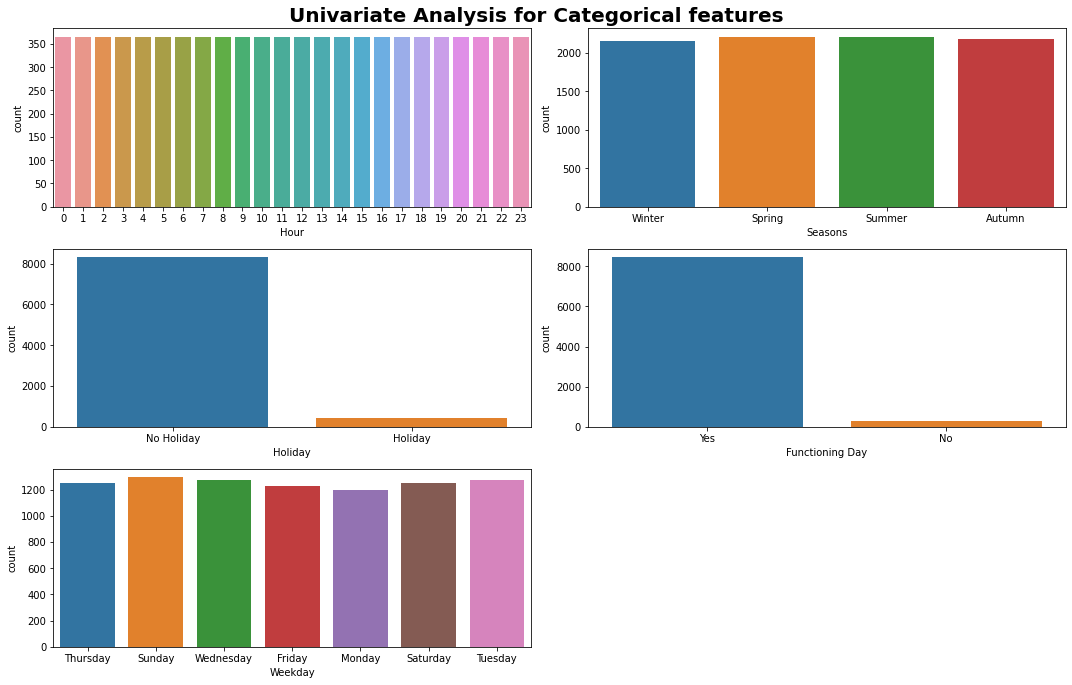

In [189]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis for Categorical features', fontsize=20, fontweight='bold', y=1.01)

for i in range(len(category_features)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[category_features[i]], data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

In [190]:
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

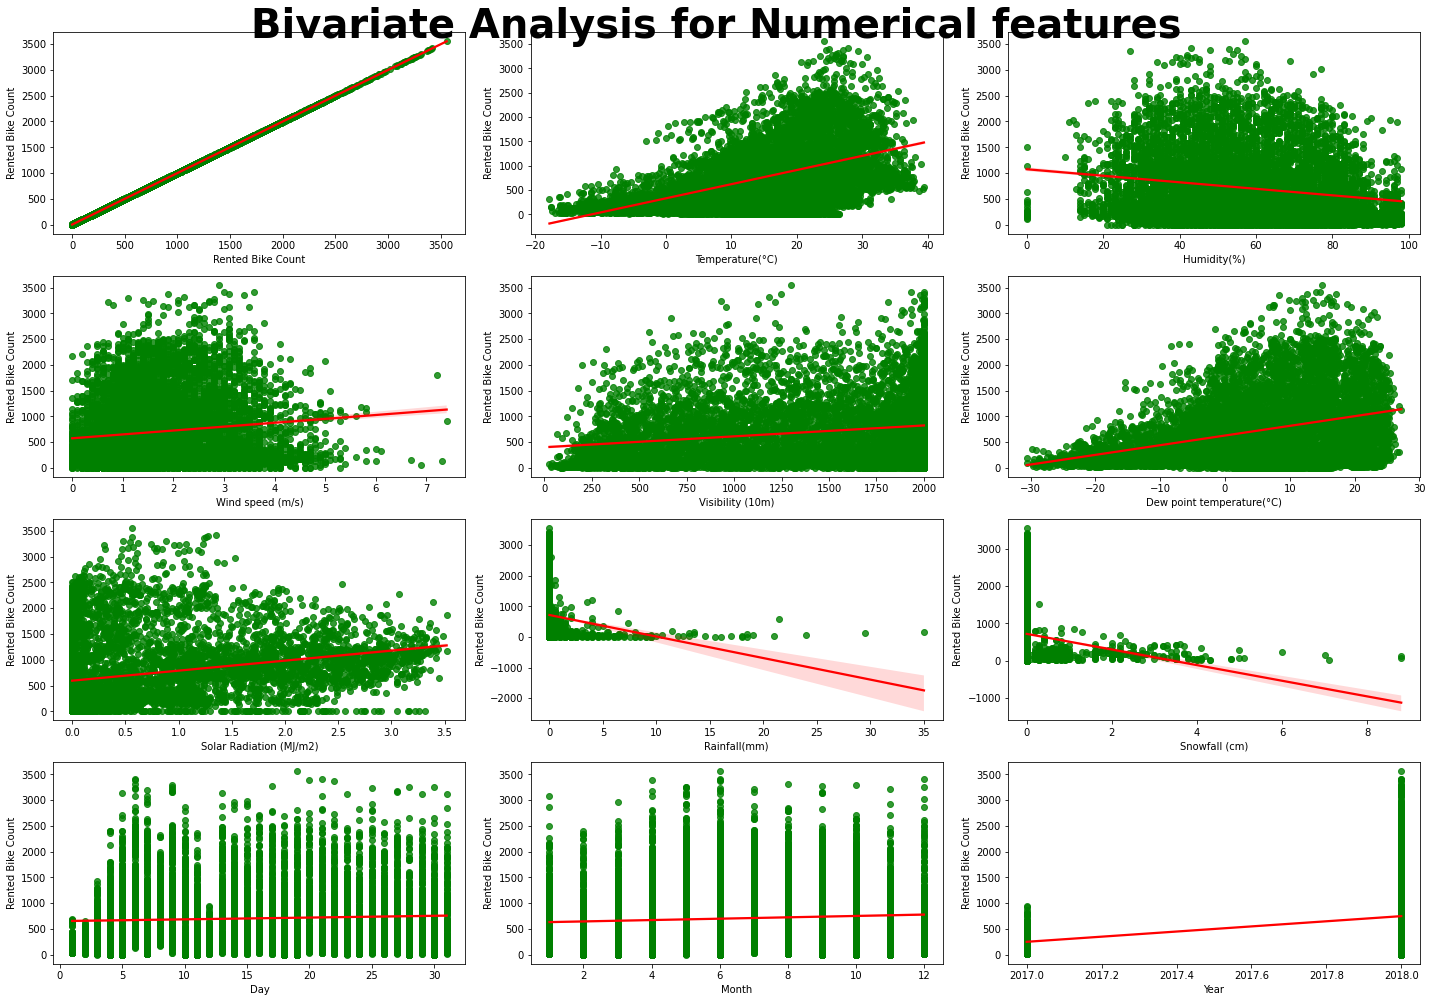

In [191]:
plt.figure(figsize=(20,20))
plt.suptitle('Bivariate Analysis for Numerical features', fontsize=40, fontweight='bold', y=1.01)

for i in range(len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.regplot(x=df[numeric_features[i]], y=df['Rented Bike Count'], line_kws={'color':'red'}, scatter_kws={"color": 'green'})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

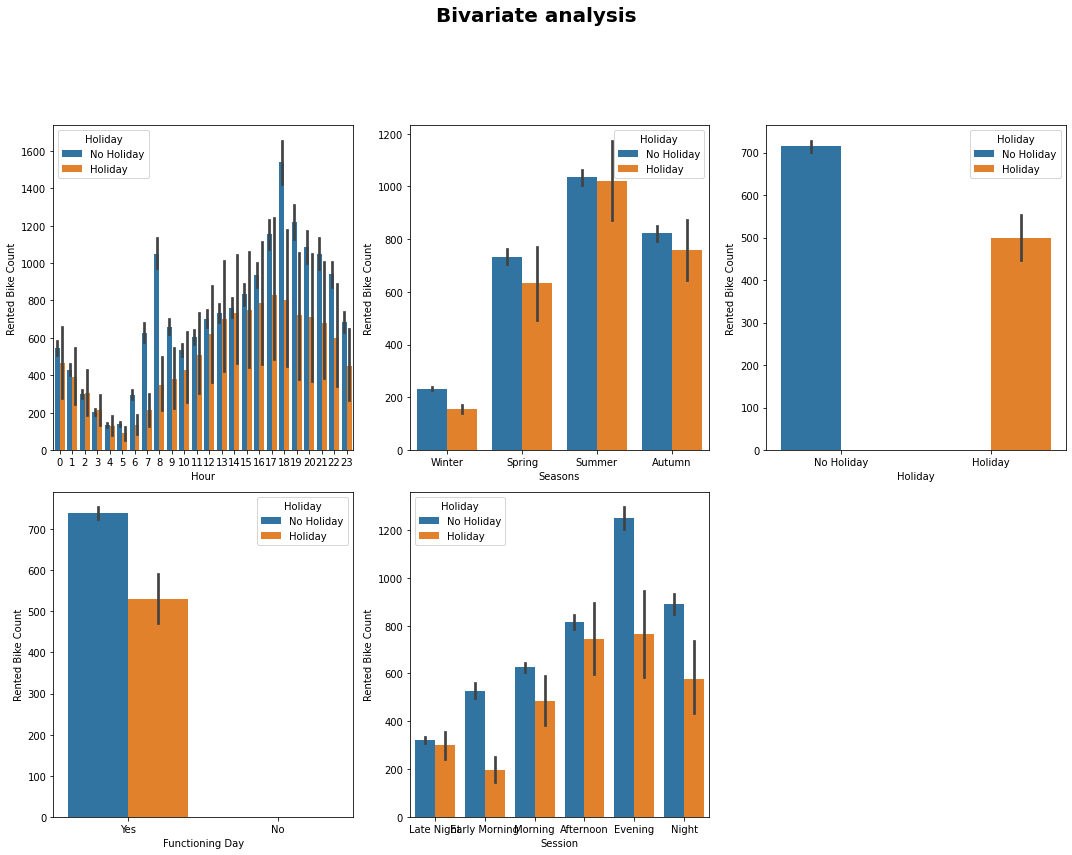

In [259]:
plt.figure(figsize=(15,15))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.1)

for i in range(len(category_features)):
    plt.subplot(3, 3, i+1)
    sns.barplot(x=df[category_features[i]], y=df['Rented Bike Count'], hue='Holiday', data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

In [260]:
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Day                            31
Month                          12
Year                            2
Weekday                         0
Session                         6
dtype: int64

In [261]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [262]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

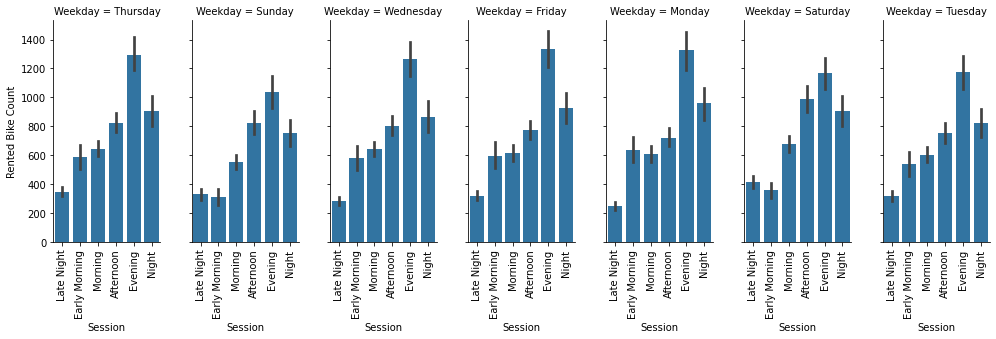

In [271]:
g = sns.FacetGrid(df, col="Weekday", height=4, aspect=.5)
g.map(sns.barplot, "Session", "Rented Bike Count")
g.set_xticklabels(rotation=90)

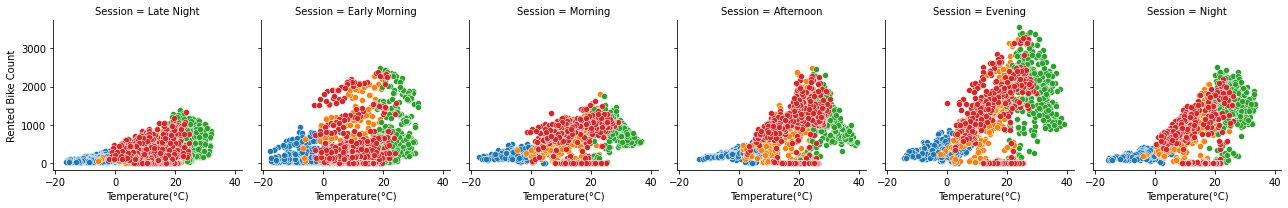

In [272]:
g = sns.FacetGrid(df, col="Session", hue='Seasons')
g.map(sns.scatterplot, "Temperature(°C)", "Rented Bike Count")

<Figure size 1440x1440 with 0 Axes>

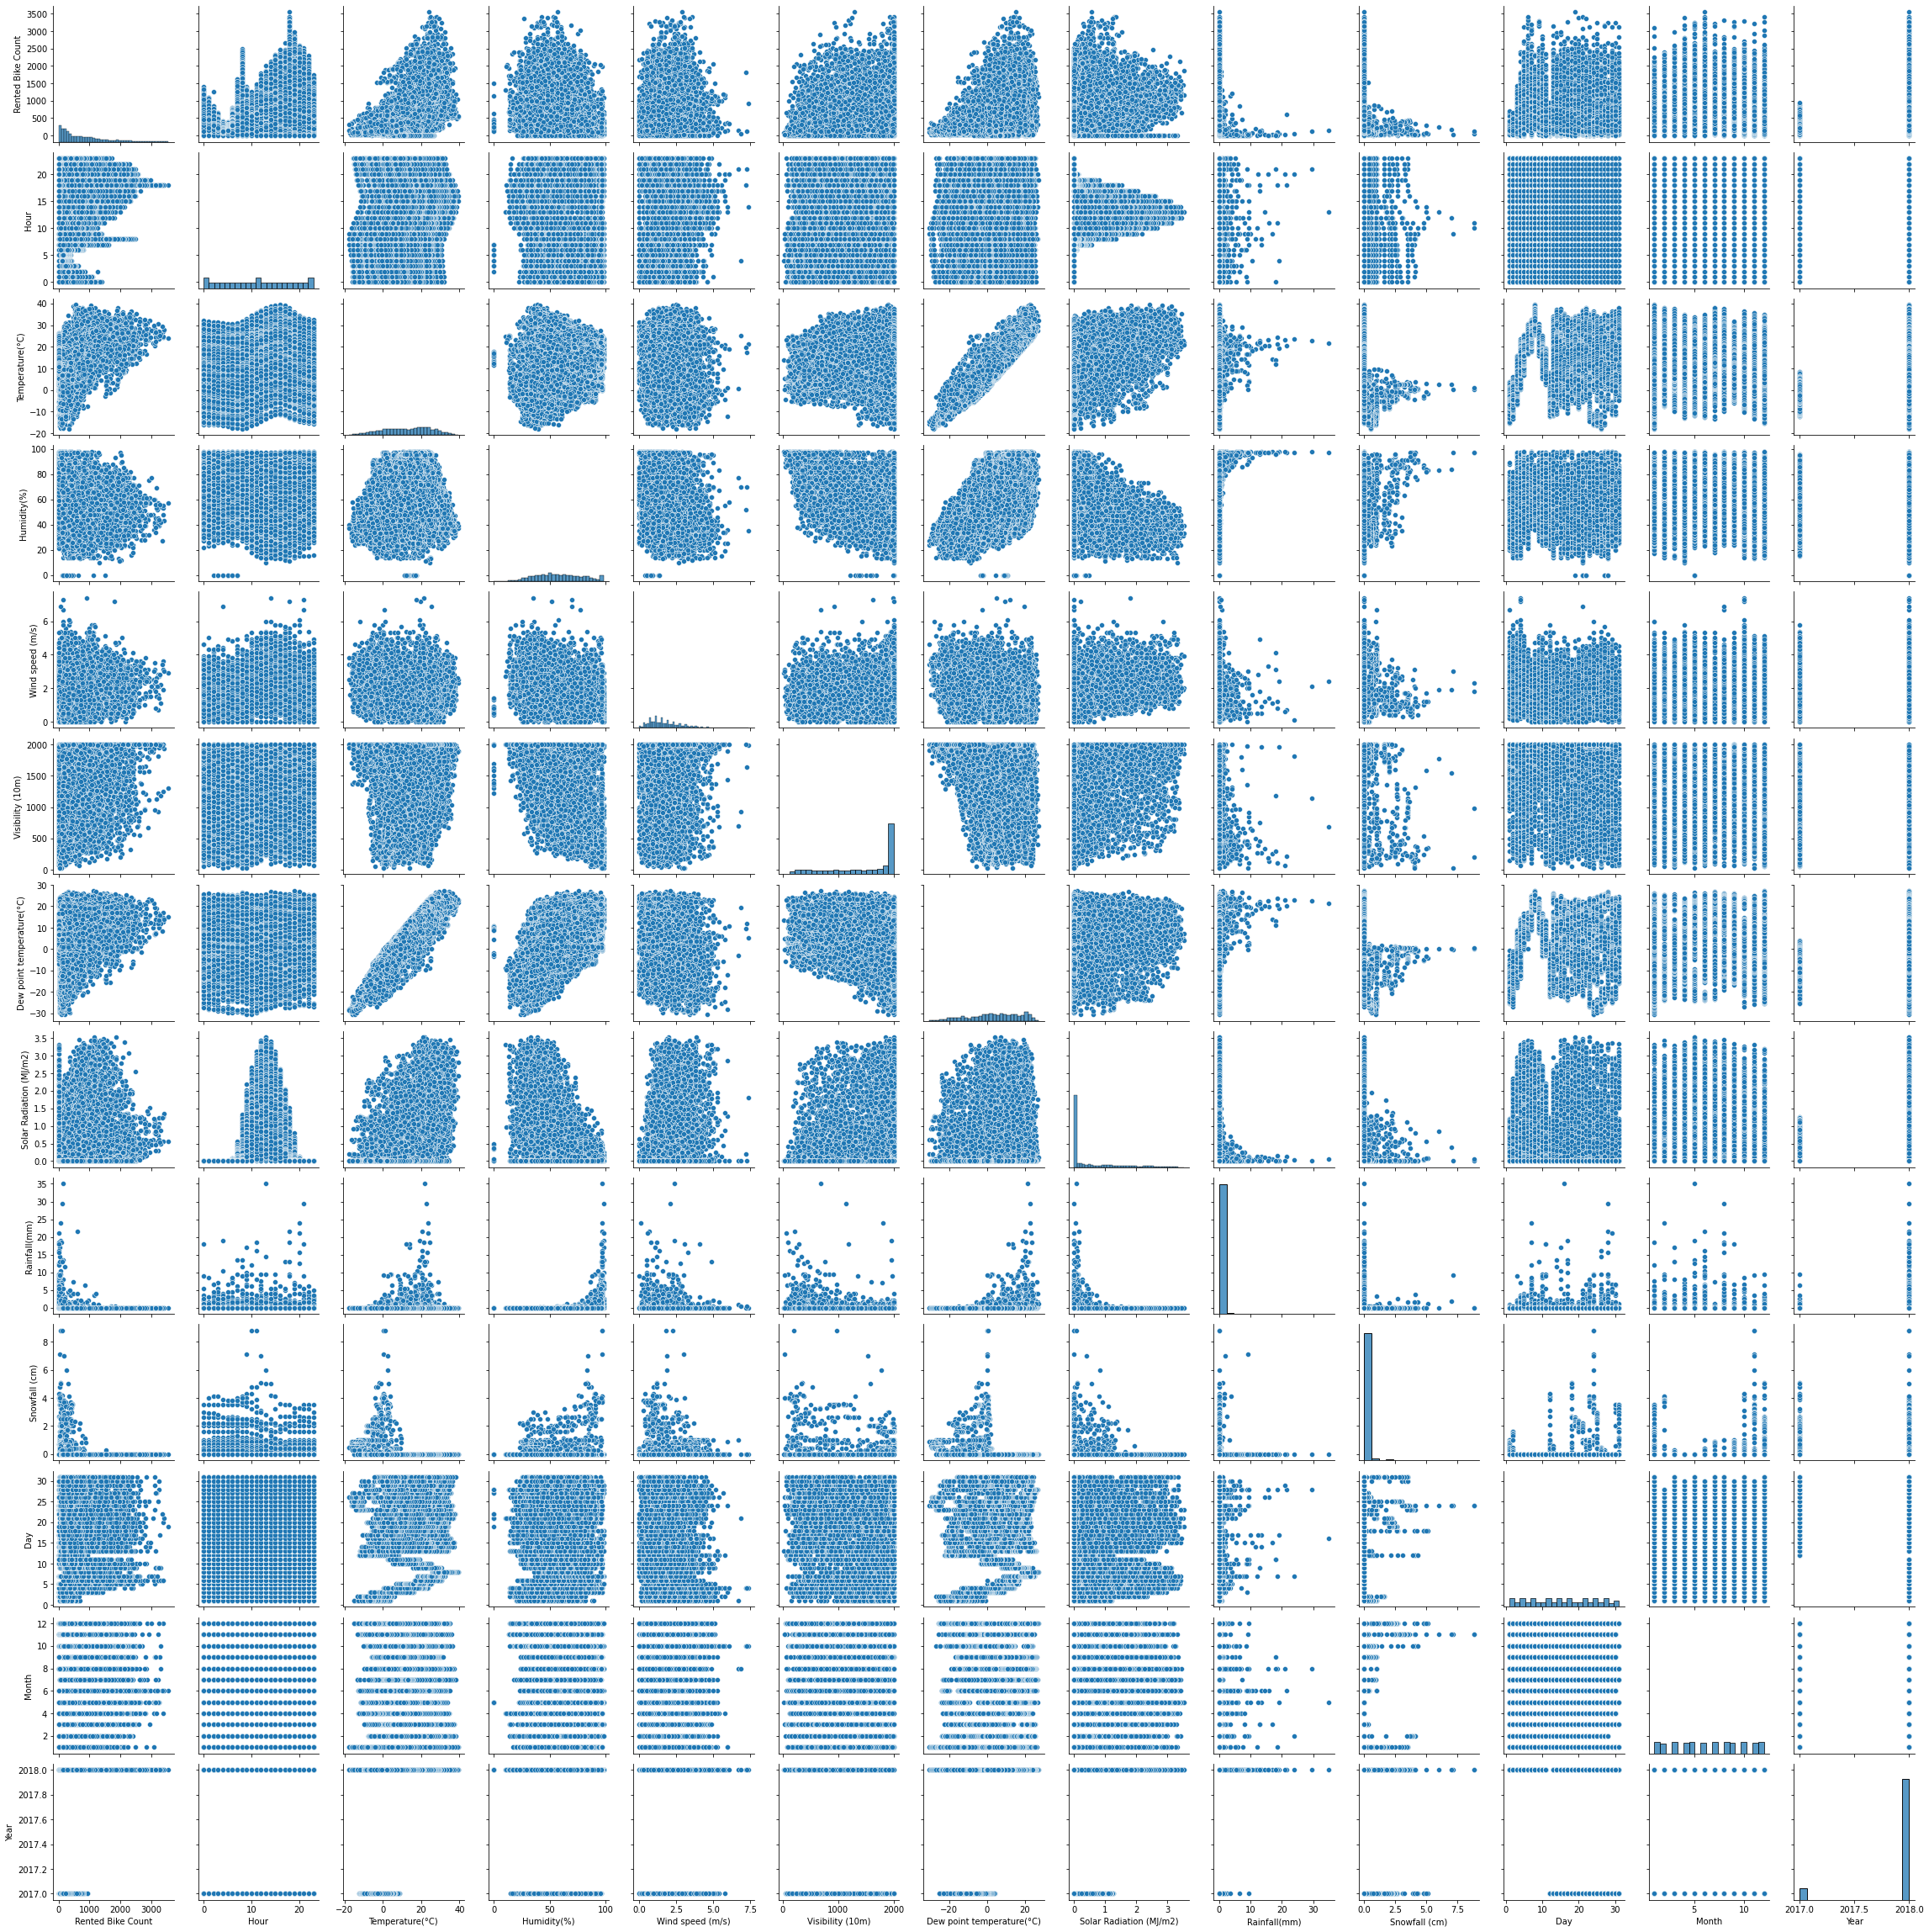

<Figure size 1440x1440 with 0 Axes>

In [274]:
sns.pairplot(df)
plt.figure(figsize=(20,20))

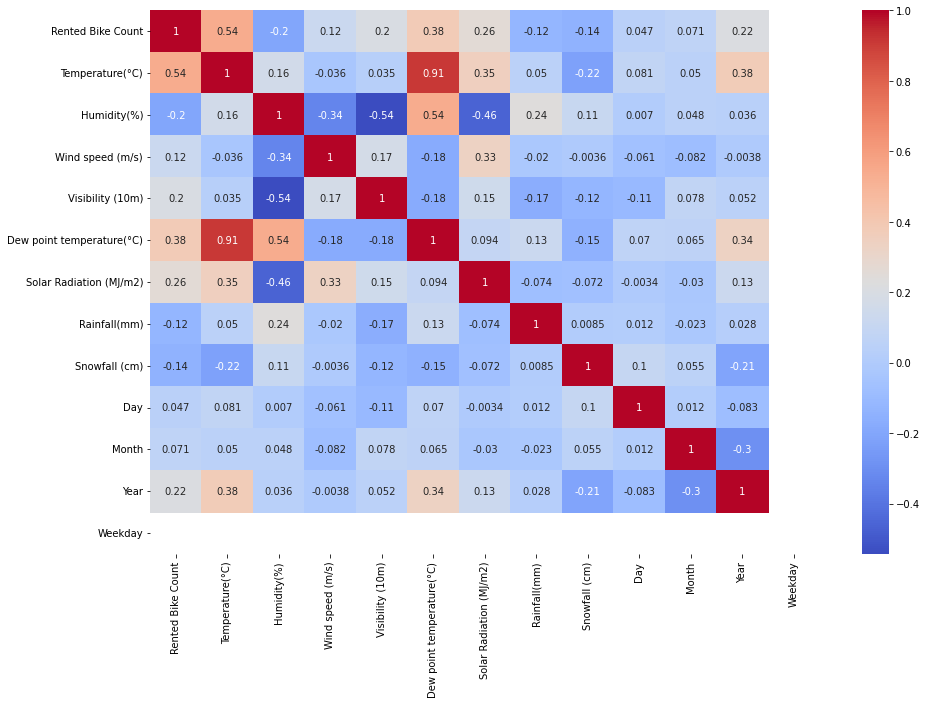

In [264]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  
  return vif

In [227]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Year', 'Dew point temperature(°C)']]])

VIF Factor                 features
0      3.20 %          Temperature(°C)
1      7.76 %              Humidity(%)
2      4.11 %         Wind speed (m/s)
3      5.72 %         Visibility (10m)
4      2.31 %  Solar Radiation (MJ/m2)
5      1.08 %             Rainfall(mm)
6      1.14 %            Snowfall (cm)
7      3.85 %                      Day
8      4.58 %                    Month
9      4.71 %                  Weekday

In [228]:
df.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year', 'Weekday'],
      dtype='object')

In [229]:
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Month']

# **Encoding**

In [235]:
df1 = df.copy()

In [236]:
df1.sample(4)

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
4766               1709   14          26.80 %           44            1.60 %   
4176                778    0          13.70 %           51            1.30 %   
6111                820   15          34.90 %           46            2.00 %   
7273                  0    1          17.50 %           66            0.50 %   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
4766               760                    13.50 %                   2.01 %   
4176              1651                     3.70 %                   0.00 %   
6111              2000                    21.50 %                   1.54 %   
7273              2000                    11.00 %                   0.00 %   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
4766        0.00 %         0.00 %  Summer  No Holiday             Yes   17   
4176        0.00 %         0.00 %  Spring  No Holiday             Yes   24   
6111        0.00 %         0.00 %  Summer  No Holiday             Yes    8   
7273        0.00 %         0.00 %  Autumn  No Holiday              No   30   

      Month  Year  Weekday     Session  
4766      6  2018      NaN   Afternoon  
4176      5  2018      NaN  Late Night  
6111     12  2018      NaN   Afternoon  
7273      9  2018      NaN  Late Night

In [237]:
df1.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [238]:
# Ordinal Encoding
df1['Functioning Day'] = df1['Functioning Day'].map({'Yes':1, 'No':0})
df1['Holiday'] = df1['Holiday'].map({'Holiday':1, 'No Holiday':0})

# A season is a period of the year that is distinguished by special climate conditions.
# The four seasons — Spring, Summer, Autumn, and Winter - follow one another regularly.

# df['Seasons'] = df['Seasons'].map({'Spring':1, 'Summer':2, 'Autumn':3, 'Winter':4})

df['Weekday'] = df['Weekday'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

# df['Session'] = df['Session'].map({'Early Morning':1, 'Morning':2, 'Afternoon':3, 'Evening':4, 'Night':5, 'Late Night':6})
# One hot encoding


df1 = pd.get_dummies(df1, columns=["Seasons","Hour", 'Session'], prefix=["seasons","hour","session"], drop_first=True)


In [200]:
# reset setting 
pd.options.display.max_columns = None

#pd.get_option('display.max_columns', None)

In [239]:
pd.get_dummies(df1, drop_first=True)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254          -5.20 %           37            2.20 %   
1                   204          -5.50 %           38            0.80 %   
2                   173          -6.00 %           39            1.00 %   
3                   107          -6.20 %           40            0.90 %   
4                    78          -6.00 %           36            2.30 %   
...                 ...              ...          ...               ...   
8755               1003           4.20 %           34            2.60 %   
8756                764           3.40 %           37            2.30 %   
8757                694           2.60 %           39            0.30 %   
8758                712           2.10 %           41            1.00 %   
8759                584           1.90 %           43            1.30 %   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                   -17.60 %                   0.00 %   
1                 2000                   -17.60 %                   0.00 %   
2                 2000                   -17.70 %                   0.00 %   
3                 2000                   -17.60 %                   0.00 %   
4                 2000                   -18.60 %                   0.00 %   
...                ...                        ...                      ...   
8755              1894                   -10.30 %                   0.00 %   
8756              2000                    -9.90 %                   0.00 %   
8757              1968                    -9.90 %                   0.00 %   
8758              1859                    -9.80 %                   0.00 %   
8759              1909                    -9.30 %                   0.00 %   

      Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  Day  Month  Year  \
0           0.00 %         0.00 %        0                1   12      1  2017   
1           0.00 %         0.00 %        0                1   12      1  2017   
2           0.00 %         0.00 %        0                1   12      1  2017   
3           0.00 %         0.00 %        0                1   12      1  2017   
4           0.00 %         0.00 %        0                1   12      1  2017   
...            ...            ...      ...              ...  ...    ...   ...   
8755        0.00 %         0.00 %        0                1   30     11  2018   
8756        0.00 %         0.00 %        0                1   30     11  2018   
8757        0.00 %         0.00 %        0                1   30     11  2018   
8758        0.00 %         0.00 %        0                1   30     11  2018   
8759        0.00 %         0.00 %        0                1   30     11  2018   

      Weekday  seasons_Spring  seasons_Summer  seasons_Winter  hour_1  hour_2  \
0         NaN               0               0               1       0       0   
1         NaN               0               0               1       1       0   
2         NaN               0               0               1       0       1   
3         NaN               0               0               1       0       0   
4         NaN               0               0               1       0       0   
...       ...             ...             ...             ...     ...     ...   
8755      NaN               0               0               0       0       0   
8756      NaN               0               0               0       0       0   
8757      NaN               0               0               0       0       0   
8758      NaN               0               0               0       0       0   
8759      NaN               0               0               0       0       0   

      hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  \
0          0       0       0       0       0       0       0        0   
1          0       0       0       0       0       0       0        0   
2  

In [240]:
df1

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254          -5.20 %           37            2.20 %   
1                   204          -5.50 %           38            0.80 %   
2                   173          -6.00 %           39            1.00 %   
3                   107          -6.20 %           40            0.90 %   
4                    78          -6.00 %           36            2.30 %   
...                 ...              ...          ...               ...   
8755               1003           4.20 %           34            2.60 %   
8756                764           3.40 %           37            2.30 %   
8757                694           2.60 %           39            0.30 %   
8758                712           2.10 %           41            1.00 %   
8759                584           1.90 %           43            1.30 %   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                   -17.60 %                   0.00 %   
1                 2000                   -17.60 %                   0.00 %   
2                 2000                   -17.70 %                   0.00 %   
3                 2000                   -17.60 %                   0.00 %   
4                 2000                   -18.60 %                   0.00 %   
...                ...                        ...                      ...   
8755              1894                   -10.30 %                   0.00 %   
8756              2000                    -9.90 %                   0.00 %   
8757              1968                    -9.90 %                   0.00 %   
8758              1859                    -9.80 %                   0.00 %   
8759              1909                    -9.30 %                   0.00 %   

      Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  Day  Month  Year  \
0           0.00 %         0.00 %        0                1   12      1  2017   
1           0.00 %         0.00 %        0                1   12      1  2017   
2           0.00 %         0.00 %        0                1   12      1  2017   
3           0.00 %         0.00 %        0                1   12      1  2017   
4           0.00 %         0.00 %        0                1   12      1  2017   
...            ...            ...      ...              ...  ...    ...   ...   
8755        0.00 %         0.00 %        0                1   30     11  2018   
8756        0.00 %         0.00 %        0                1   30     11  2018   
8757        0.00 %         0.00 %        0                1   30     11  2018   
8758        0.00 %         0.00 %        0                1   30     11  2018   
8759        0.00 %         0.00 %        0                1   30     11  2018   

      Weekday  seasons_Spring  seasons_Summer  seasons_Winter  hour_1  hour_2  \
0         NaN               0               0               1       0       0   
1         NaN               0               0               1       1       0   
2         NaN               0               0               1       0       1   
3         NaN               0               0               1       0       0   
4         NaN               0               0               1       0       0   
...       ...             ...             ...             ...     ...     ...   
8755      NaN               0               0               0       0       0   
8756      NaN               0               0               0       0       0   
8757      NaN               0               0               0       0       0   
8758      NaN               0               0               0       0       0   
8759      NaN               0               0               0       0       0   

      hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  \
0          0       0       0       0       0       0       0        0   
1          0       0       0       0       0       0       0        0   
2  

In [241]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   int64  
 10  Functioning Day            8760 non-null   int64  
 11  Day                        8760 non-null   int64  
 12  Month                      8760 non-null   int64  
 13  Year                       8760 non-null   int64

In [242]:
df1.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Day', 'Month', 'Year', 'Weekday', 'seasons_Spring',
       'seasons_Summer', 'seasons_Winter', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'session_Early Morning', 'session_Evening',
       'session_Late Night', 'session_Morning', 'session_Night'],
      dtype='object')

In [205]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression#Correlation

# fs = SelectKBest(score_func=f_regression, k='all')
# fs.fit(X, y)

# feature_contribution=(fs.scores_/sum(fs.scores_))*100

# for i,j in enumerate(X.columns):
#     print(f'{j} : {feature_contribution[i]:.2f}%')
# plt.figure(figsize=(12,6))
# sns.barplot(x=X.columns,y=fs.scores_)
# plt.show()

In [206]:
numerical_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [243]:
features = numerical_features.copy()
features.extend(['Holiday',
       'Functioning Day','seasons_Spring',
       'seasons_Summer', 'seasons_Winter', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23','session_Early Morning', 'session_Evening',
       'session_Late Night', 'session_Morning', 'session_Night'])
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Holiday',
 'Functioning Day',
 'seasons_Spring',
 'seasons_Summer',
 'seasons_Winter',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'session_Early Morning',
 'session_Evening',
 'session_Late Night',
 'session_Morning',
 'session_Night']

In [244]:
len(features)

42

In [245]:
X = df1[features]
y = df1['Rented Bike Count']

In [246]:
# linear regression model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

print(X_train.shape)
print(X_test.shape)

(7008, 42)
(1752, 42)


In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [248]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [249]:
reg.score(X_train, y_train)

0.6615609182607856

In [250]:
reg.score(X_test, y_test)

0.6604490617489571

In [251]:
y_pred = reg.predict(X_test)

In [252]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 142657.13395596374
RMSE : 377.6997934285426
R2 : 0.6604490617489571
Adjusted R2 :  0.6521043341851516


In [253]:
# Lasso ridge


In [254]:
from xgboost import XGBRegressor

In [255]:
from sklearn.model_selection import cross_val_score

In [256]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

[13:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [257]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [258]:
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
# rmse_cross_val = rmse_cv(xgb)
# print("RMSE Cross-Validation:", rmse_cross_val)

# new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
# models = models.append(new_row, ignore_index=True)

MAE: 191.17152139197475
MSE: 74389.99648068726
RMSE: 272.74529598269385
R2 Score: 0.8229377501071464
------------------------------
